In [1]:
# Import Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import abline_plot
from sklearn.linear_model import LinearRegression


plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)



In [2]:
# Load the dataset
olympic_df = pd.read_csv('..\Resources\Machine_Learning_datasetv2.csv')
olympic_df = olympic_df.drop(['Unnamed: 0'], axis=1)

# Load the dataset
#olympic_df = pd.read_csv('Machine_Learning_datasetv2.csv')
#olympic_df = olympic_df.drop(['Unnamed: 0'], axis=1)

In [3]:
# Sort for Summer Olympics Results
summer_olympic_df = olympic_df[olympic_df['Season'] == 'Summer']
summer_olympic_df = summer_olympic_df.rename(columns={'GDP per capita': 'gdp_per_capita'})
summer_olympic_df['lnPopulation'] = np.log2(summer_olympic_df['Population'])
summer_olympic_df

,NOC,Year,Season,Host,athlete_count_x,Population,gdp_per_capita,Gold,Silver,Bronze,country_medal_total,athlete_count_y,olympic_total,medal_share,athlete_share,lnPopulation
0,AFG,1960,Summer,0,13,8996967.0,1326.0,0.0,0.0,0.0,0.0,5272,297.0,0.000000,0.002466,23.101007
1,ARG,1960,Summer,0,78,20481781.0,8861.0,0.0,1.0,1.0,2.0,5272,297.0,0.006734,0.014795,24.287838
2,AUS,1960,Summer,0,201,10276477.0,14013.0,8.0,8.0,6.0,22.0,5272,297.0,0.074074,0.038126,23.292842
3,AUT,1960,Summer,0,161,7047539.0,10391.0,1.0,1.0,0.0,2.0,5272,297.0,0.006734,0.030539,22.748688
4,BEL,1960,Summer,0,103,9153489.0,11081.0,0.0,2.0,2.0,4.0,5272,297.0,0.013468,0.019537,23.125890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,TTO,1976,Summer,0,14,1025104.0,15696.0,1.0,0.0,0.0,1.0,4870,338.0,0.002959,0.002875,19.967339
2174,TUN,1976,Summer,0,5,5786482.0,4095.0,0.0,0.0,0.0,0.0,4870,338.0,0.000000,0.001027,22.464255
2175,TUR,1976,Summer,0,28,40189561.0,6110.0,0.0,0.0,0.0,0.0,4870,338.0,0.000000,0.005749,25.260317
2176,USA,1976,Summer,0,445,218035000.0,27058.0,34.0,35.0,25.0,94.0,4870,338.0,0.278107,0.091376,27.699985


In [4]:
# Athlete Count Linear Regression model
model_ac = sm.ols(formula='medal_share ~ athlete_share', data=summer_olympic_df).fit()
model_ac.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            medal_share   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     3479.
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:59:20   Log-Likelihood:                 5125.4
No. Observations:                1792   AIC:                        -1.025e+04
Df Residuals:                    1790   BIC:                        -1.024e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0040      0.000    -10.395      0.000      -0.005      -0.003
athlete_share     1.4835      0.025     58.979      0.000       1.434       1.533
==============================================================================
Omnibus:                     1965.816   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           374681.225
Skew:                           5.083   Prob(JB):                         0.00
Kurtosis:                      73.105   Cond. No.                         76.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(1792,)


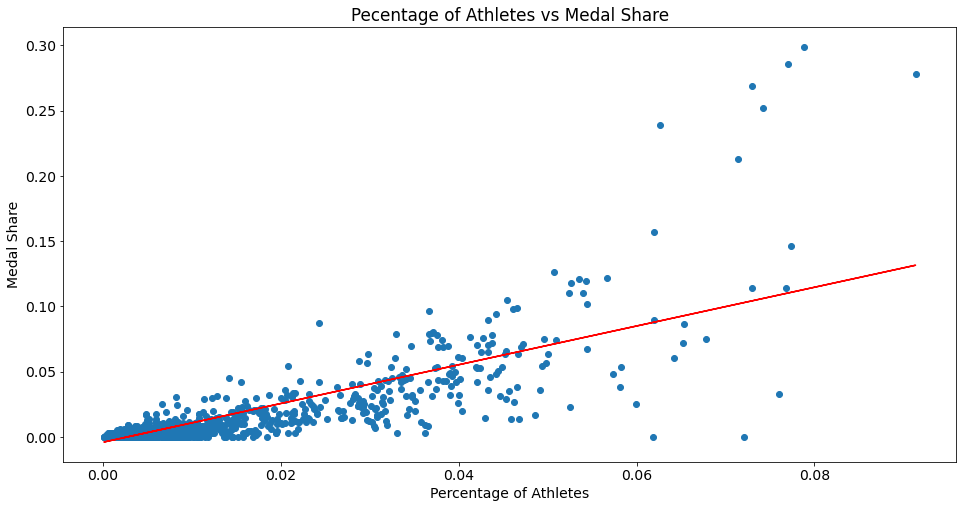

<Figure size 1152x576 with 0 Axes>

In [5]:
#Plotting Athlete Count Linear Regression
X = summer_olympic_df.athlete_share.values.reshape(-1, 1)
y = summer_olympic_df.medal_share
modela = LinearRegression()
modela.fit(X, y)
modela.fit(X, y)
y_pred = modela.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.xlabel('Percentage of Athletes')
plt.ylabel('Medal Share')
plt.plot(X, y_pred, color='red')
plt.title('Pecentage of Athletes vs Medal Share')
plt.show()
plt.savefig('Percentage of Athletes vs Medal Share.pdf')

In [6]:
# GDP Linear Regression model
model_gdp = sm.ols(formula='medal_share ~ gdp_per_capita', data=summer_olympic_df).fit()
model_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            medal_share   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     90.26
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           6.43e-21
Time:                        20:59:20   Log-Likelihood:                 4202.2
No. Observations:                1792   AIC:                            -8400.
Df Residuals:                    1790   BIC:                            -8389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0038      0.001      5.300      0.000       0.002       0.005
gdp_per_capita   3.84e-07   4.04e-08      9.501      0.000    3.05e-07    4.63e-07
==============================================================================
Omnibus:                     2167.509   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           260684.746
Skew:                           6.336   Prob(JB):                         0.00
Kurtosis:                      60.712   Cond. No.                     2.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(1792,)


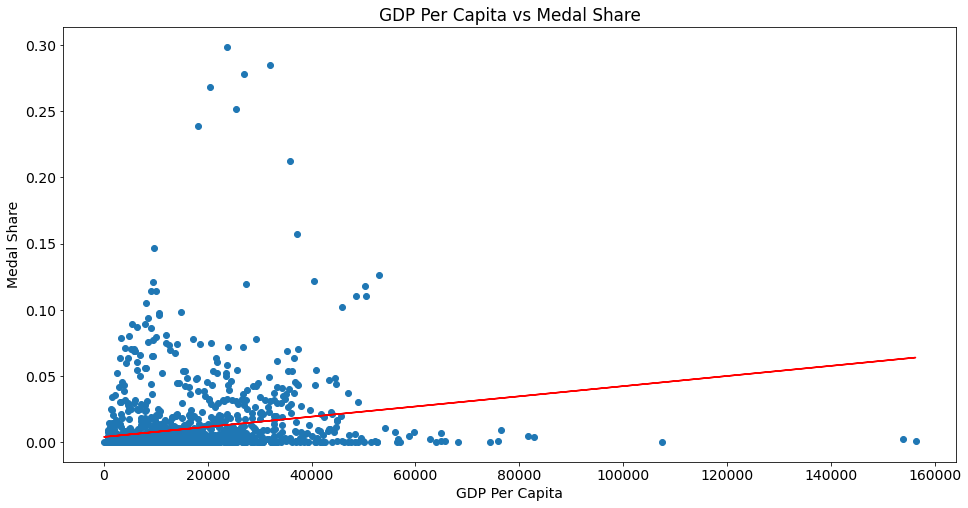

<Figure size 1152x576 with 0 Axes>

In [7]:
#Plotting GDP Linear Regression
X = summer_olympic_df.gdp_per_capita.values.reshape(-1, 1)
y = summer_olympic_df.medal_share
modela = LinearRegression()
modela.fit(X, y)
modela.fit(X, y)
y_pred = modela.predict(X)
print(y_pred.shape)
plt.xlabel('GDP Per Capita')
plt.ylabel('Medal Share')
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('GDP Per Capita vs Medal Share')
plt.show()
plt.savefig('GDP Per Capita vs Medal Share.pdf')

In [8]:
# Population Linear Regression model
model_pop = sm.ols(formula='medal_share ~ lnPopulation', data=summer_olympic_df).fit()
model_pop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            medal_share   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     246.0
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           4.76e-52
Time:                        20:59:20   Log-Likelihood:                 4273.5
No. Observations:                1792   AIC:                            -8543.
Df Residuals:                    1790   BIC:                            -8532.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0707      0.005    -13.949      0.000      -0.081      -0.061
lnPopulation     0.0034      0.000     15.685      0.000       0.003       0.004
==============================================================================
Omnibus:                     2121.426   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           250019.671
Skew:                           6.094   Prob(JB):                         0.00
Kurtosis:                      59.568   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(1792,)


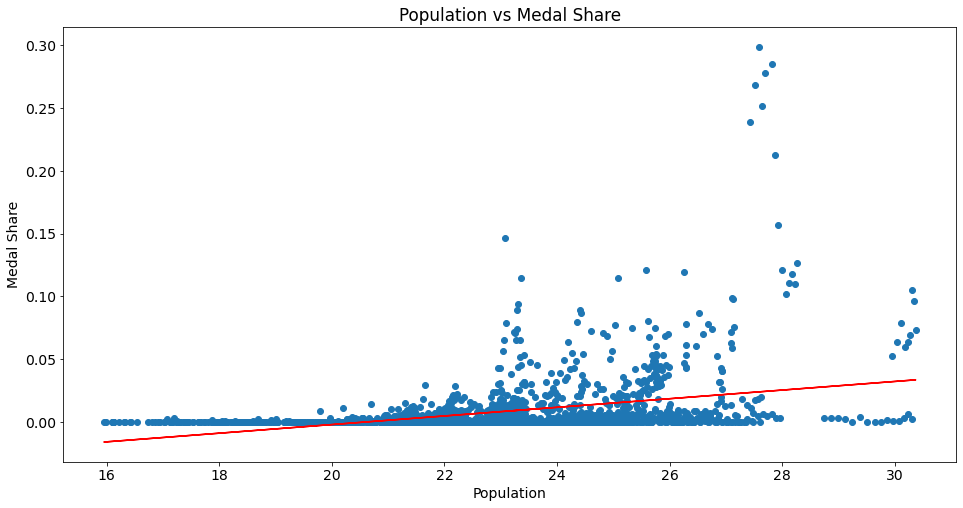

In [9]:
#Plotting Population Linear Regression
X = summer_olympic_df.lnPopulation.values.reshape(-1, 1)
y = summer_olympic_df.medal_share
modela = LinearRegression()
modela.fit(X, y)
modela.fit(X, y)
y_pred = modela.predict(X)
print(y_pred.shape)
plt.xlabel('Population')
plt.ylabel('Medal Share')
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('Population vs Medal Share')
plt.savefig('Population vs Medal Share.pdf')
plt.show()

In [10]:
# Multiple Linear Regression model
model_mlr = sm.ols(formula='medal_share ~ gdp_per_capita + athlete_share + Host + lnPopulation', data=summer_olympic_df).fit()
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            medal_share   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     874.3
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:59:21   Log-Likelihood:                 5129.5
No. Observations:                1792   AIC:                        -1.025e+04
Df Residuals:                    1787   BIC:                        -1.022e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0055      0.004     -1.582      0.114      -0.012       0.001
gdp_per_capita -5.056e-08   2.59e-08     -1.949      0.052   -1.01e-07    3.31e-10
athlete_share      1.4790      0.031     48.169      0.000       1.419       1.539
Host               0.0072      0.004      1.783      0.075      -0.001       0.015
lnPopulation    9.007e-05      0.000      0.590      0.556      -0.000       0.000
==============================================================================
Omnibus:                     1949.531   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           371655.910
Skew:                           5.005   Prob(JB):                         0.00
Kurtosis:                      72.838   Cond. No.                     1.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""